## Import Statements

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cupy as cp
import scipy as sp

## Useful Functions

In [15]:
def RandNormal(center: float, width: float, size: int, dist_tightness=0.25, Absolute=0):
    '''Docstring WIP'''
    if (not Absolute) and ((width<0) or (width>1)):
        raise ValueError(f"width must be between 0 and 1 in relative mode. Width - {width}")
    tight_function = lambda t: t/(1-t)
    b = tight_function(dist_tightness)
    scale = 1/b
    rv = sp.stats.truncnorm(-b,b,loc=0,scale=scale)
    if Absolute:
        return center + width*rv.rvs(size=size,random_state=None)
    else:
        return center*(1 + width*rv.rvs(size=size,random_state=None))

## Hyperparams

In [16]:
#Space Grid
rmin = 1e-6
rmax = 1.1
nr = 50
r, dr = np.linspace(rmin, rmax, nr, retstep = True)

#Time Grid
tmin = 2.9
tmax = 4.0
nt = 1000
t, dt = np.linspace(tmin, tmax, nt, retstep = True)

#Number of Samples
size = 1000

#Output File
Output_File = 'ProfileDataset622v2.pickle'

#Flags
Plotting = 1
save = 0
if size > 1000:
    Plotting = 0

### Todo
* Change centers easily, create distribution tools
* Hyper-Realistic Parameter Spaces

## Tightness Function

99


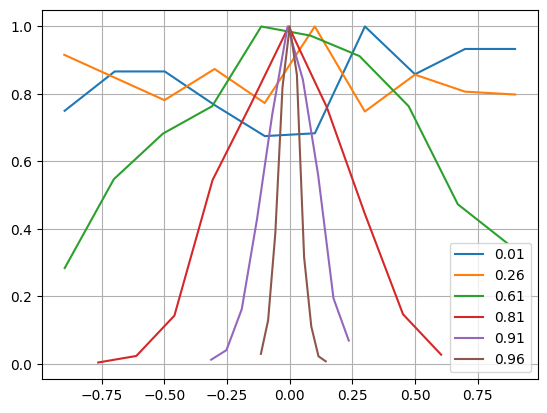

In [17]:
Tvals = np.arange(0.01,1,0.01)
print(len(Tvals))
TData = []
for Ti in Tvals:
    TDi = RandNormal(0, 1, 1000, dist_tightness=Ti, Absolute=1)
    TData.append(TDi)
TData = np.array(TData)
#TX = np.repeat(Tvals, 1000)
# plt.scatter(TX, TData, s=3, c='k', alpha=0.05)
VA = [0,25, 60, 80, 90, 95]
for V in VA:
    a = np.histogram(TData[V],bins=10)
    X = (a[1][1:] + a[1][:-1])/2
    plt.plot(X, a[0]/(a[0].max()),label=f'{np.round(Tvals[V],2)}')
plt.legend()
plt.grid()

## Spacial Source Profiles

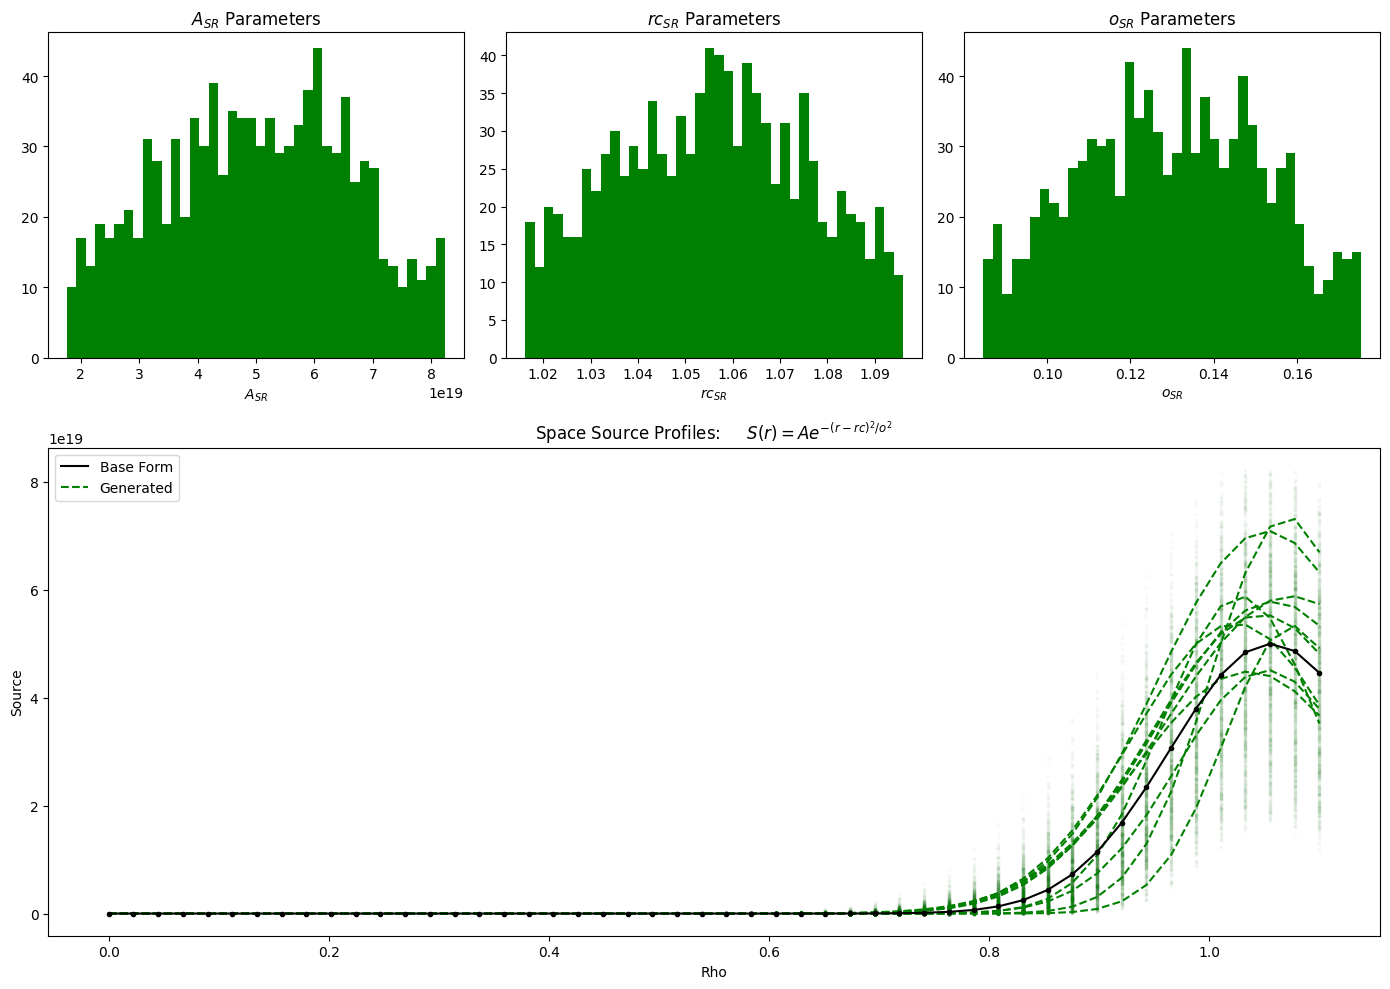

In [18]:
#Spacial Source Function/Base Form
SRFunc = lambda r,A,rc,o: A*np.e**(-(r-rc)**2/(o**2))
SRBase = SRFunc(r, 5e19, 1.056, 0.13)

#Distribution Tightness
SRtightness = 0.6

#Generate Parameters
A_SR = RandNormal(5e19, 0.65, size, dist_tightness=SRtightness, Absolute=0)
rc_SR = RandNormal(1.056, 0.04, size, dist_tightness=SRtightness, Absolute=1)
o_SR = RandNormal(0.13, 0.35, size, dist_tightness=SRtightness, Absolute=0)

#Plotting
if Plotting:
    #Setting Up Plot
    RhoSourcePlot = plt.figure(figsize=(14,10))
    SRgs = gridspec.GridSpec(2, 3, height_ratios=[1, 1.5])
    SRax1 = RhoSourcePlot.add_subplot(SRgs[0, 0])
    SRax2 = RhoSourcePlot.add_subplot(SRgs[0, 1])
    SRax3 = RhoSourcePlot.add_subplot(SRgs[0, 2])
    SRax4 = RhoSourcePlot.add_subplot(SRgs[1, :])
    
    #Amplitude Histogram
    SRax1.hist(A_SR, bins=int(size/25), color='g')
    SRax1.set_xlabel(r'$A_{SR}$')
    SRax1.set_title(r'$A_{SR}$ Parameters')
    
    #Center Histogram
    SRax2.hist(rc_SR, bins=int(size/25), color='g')
    SRax2.set_xlabel(r'$rc_{SR}$')
    SRax2.set_title(r'$rc_{SR}$ Parameters')
    
    #Width Histogram
    SRax3.hist(o_SR, bins=int(size/25), color='g')
    SRax3.set_xlabel(r'$o_{SR}$')
    SRax3.set_title(r'$o_{SR}$ Parameters')
    
    #Plotting Profiles
    SRax4.plot([],[],'-k', label='Base Form')
    SRax4.plot([],[],'--g', label='Generated')
    for i in range(size):
        SRi = SRFunc(r, A_SR[i], rc_SR[i], o_SR[i])
        if i < 10:
            SRax4.plot(r, SRi, '--g')
        SRax4.scatter(r, SRi, c='g', s=3, alpha=0.02) #Alpha Auto Better
    SRax4.plot(r, SRBase, '-k'); SRax4.plot(r, SRBase, '.k')
    SRax4.set_xlabel('Rho'); SRax4.set_ylabel('Source')
    SRax4.set_title(r'Space Source Profiles:     $S(r) = Ae^{-(r-rc)^2/o^2}$')
    SRax4.legend(); plt.tight_layout(); plt.show()

## Time Source Profiles

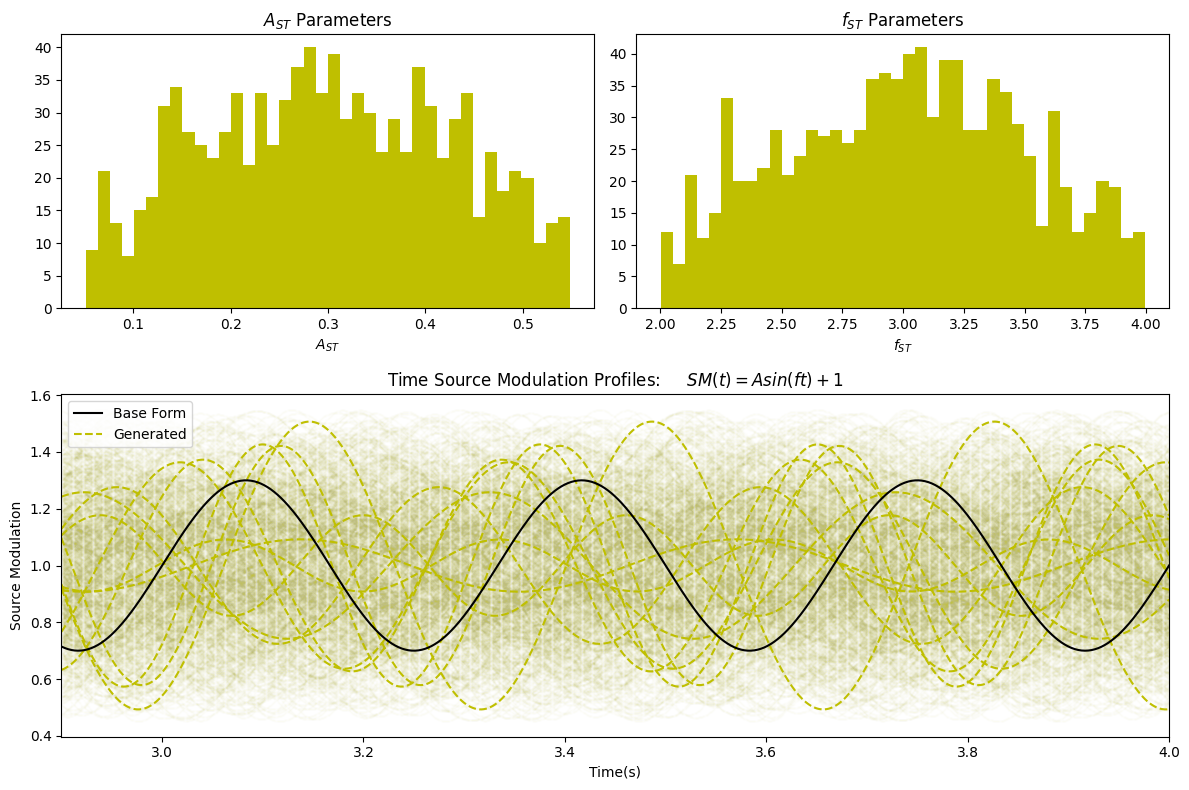

In [19]:
#Time Source Function/Base Form
STFunc = lambda t, A, f: A*np.sin(2*f*np.pi*t) + 1
STBase = STFunc(t, 0.3, 3)

#Distribution Tightness
STtightness = 0.6

#Generating Parameters
A_ST = RandNormal(0.3, 0.25, size, dist_tightness=STtightness, Absolute=1)
f_ST = RandNormal(3, 1, size, dist_tightness=STtightness, Absolute=1)

#Plotting
if Plotting:
    
    #Setting Up Plot
    TimeSourcePlot = plt.figure(figsize=(12,8))
    STgs = gridspec.GridSpec(2, 2, height_ratios=[1, 1.25])
    STax1 = TimeSourcePlot.add_subplot(STgs[0, 0])
    STax2 = TimeSourcePlot.add_subplot(STgs[0, 1])
    STax4 = TimeSourcePlot.add_subplot(STgs[1, :])
    
    #Amplitude Histogram
    STax1.hist(A_ST, bins=int(size/25), color='y')
    STax1.set_xlabel(r'$A_{ST}$')
    STax1.set_title(r'$A_{ST}$ Parameters')
    
    #Center Histogram
    STax2.hist(f_ST, bins=int(size/25), color='y')
    STax2.set_xlabel(r'$f_{ST}$')
    STax2.set_title(r'$f_{ST}$ Parameters')
    
    #Plotting Profiles
    STax4.plot([],[],'-k', label='Base Form')
    STax4.plot([],[],'--y', label='Generated')
    STax4.legend(loc='best')
    for i in range(size):
        STi = STFunc(t, A_ST[i], f_ST[i])
        if i < 10:
            STax4.plot(t, STi, '--y')
        STax4.scatter(t, STi, c='y', s=1, alpha=0.01) #Alpha Auto Better
    STax4.plot(t, STBase, '-k')
    STax4.set_xlabel('Time(s)'); STax4.set_ylabel('Source Modulation')
    STax4.set_xlim(tmin, tmax)
    STax4.set_title(r'Time Source Modulation Profiles:     $SM(t) = Asin\left(ft\right) + 1$')
    plt.tight_layout(); plt.show()

## Diffusion Profiles

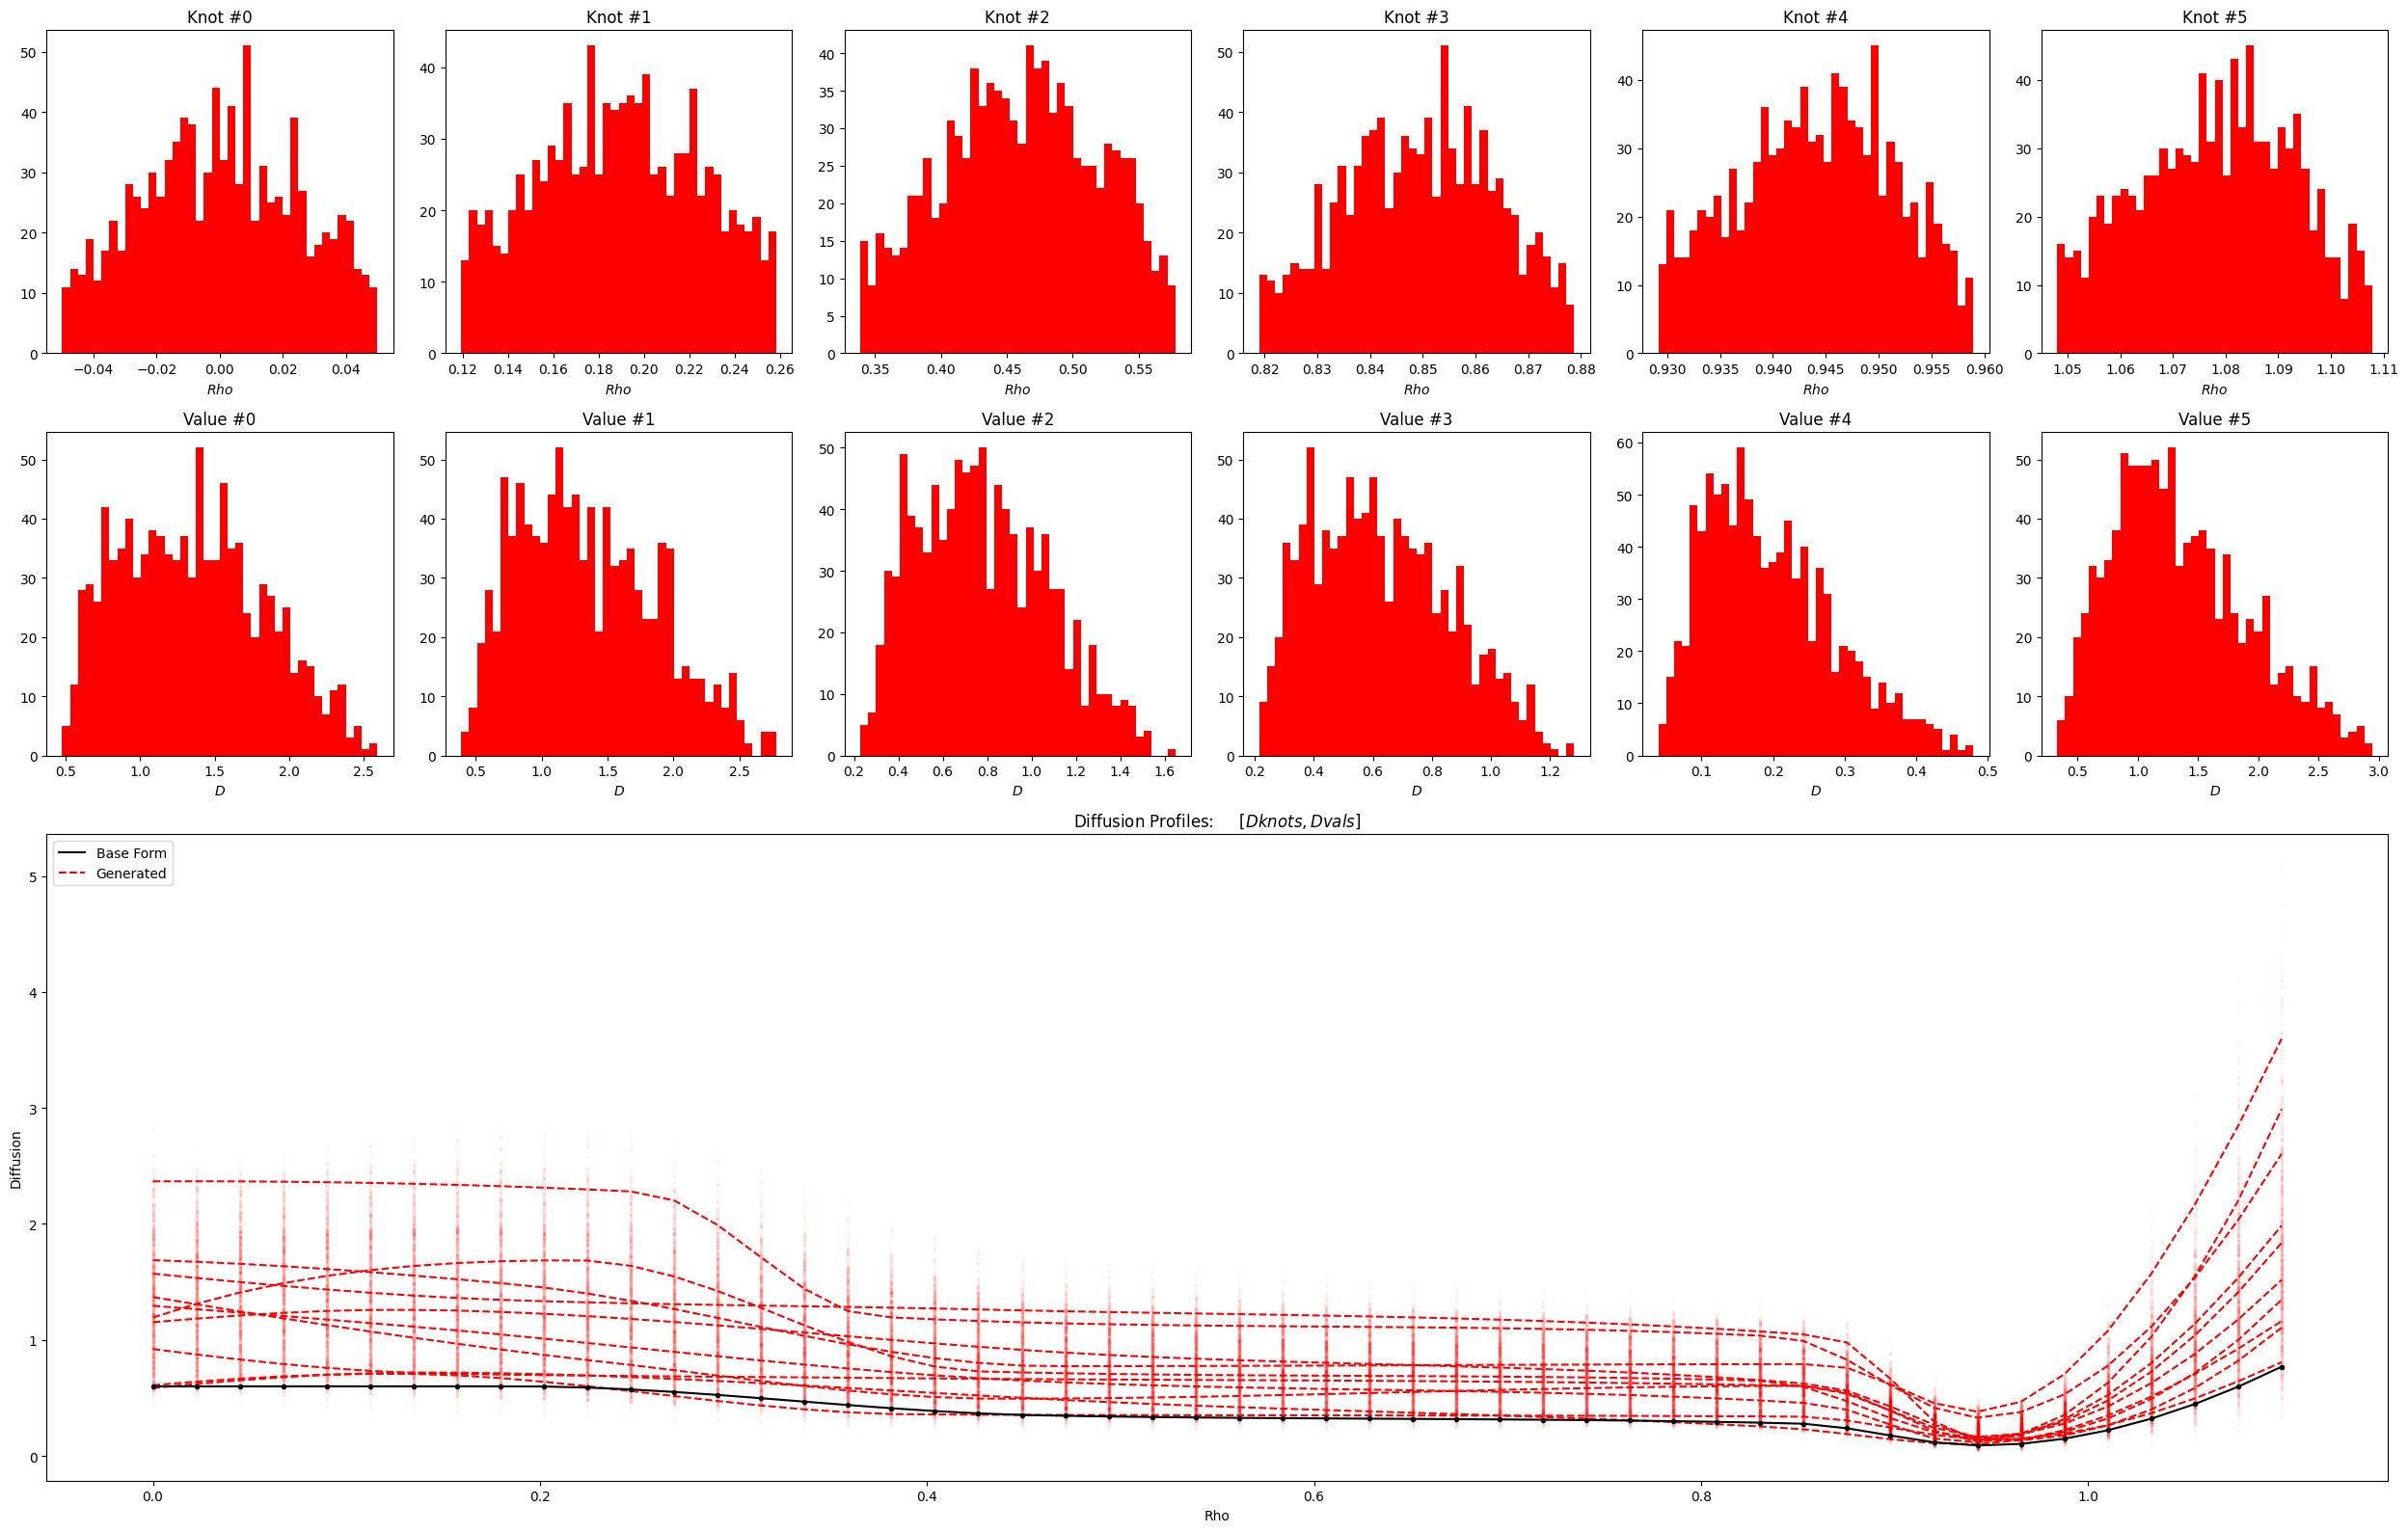

In [20]:
#Diffusion Function/Base Form
Dvals = np.array([0.6, 0.6, 0.35, 0.28, 0.09, 0.6])
Dknots = np.array([0, 0.189, 0.458, 0.849, 0.944, 1.078])
DFunc = lambda r, DK, DV: sp.interpolate.PchipInterpolator(DK, DV)(r)
DBase = DFunc(r, Dknots, Dvals)

#Distribution Tightness
Dtightness = 0.6
Dwidthsv = np.array([0.25,0.4,0.35,0.35,0.6,0.47])
Dwidthsk = np.array([0.05,0.07,0.12,0.03,0.015,0.03])

#Generating Parameters
valarr_Dv = []
valarr_Dk = []
for i, val in enumerate(Dvals):
    newvalv = RandNormal(val, Dwidthsv[i], size, dist_tightness=Dtightness, Absolute=0)
    valarr_Dv.append(newvalv)
    newvalk = RandNormal(Dknots[i], Dwidthsk[i], size, dist_tightness=Dtightness, Absolute=1)
    valarr_Dk.append(newvalk)
scalearrD = np.vstack((2.5*np.random.random(size=size)+1))
valarr_Dv = np.array(valarr_Dv).T
valarr_Dv = valarr_Dv*scalearrD
valarr_Dk = np.array(valarr_Dk).T

#Plotting
if Plotting:
    #Setting Up Plot
    DiffPlot = plt.figure(figsize=(25,16))
    Dgs = gridspec.GridSpec(3, 6, height_ratios=[1, 1, 2])
    Dax1 = []
    Dax2 = []
    for i in range(6):
        Dax1.append(DiffPlot.add_subplot(Dgs[0, i]))
        Dax2.append(DiffPlot.add_subplot(Dgs[1, i]))
    Dax3 = DiffPlot.add_subplot(Dgs[2, :])
    
    #Knots Histograms
    for i in range(6):
        Dax1[i].hist(valarr_Dk.T[i], bins=int(size/25), color='r')
        Dax1[i].set_xlabel(r'$Rho$')
        Dax1[i].set_title(f'Knot #{i}')
    
    #Vals Histograms
    for i in range(6):
        Dax2[i].hist(valarr_Dv.T[i], bins=int(size/25), color='r')
        Dax2[i].set_xlabel(r'$D$')
        Dax2[i].set_title(f'Value #{i}')
    
    #Plotting Profiles
    Dax3.plot([],[],'-k', label='Base Form')
    Dax3.plot([],[],'--r', label='Generated')
    for i in range(size):
        Di = DFunc(r, valarr_Dk[i], valarr_Dv[i])
        if i < 10:
            Dax3.plot(r, Di, '--r')
        Dax3.scatter(r, Di, c='r', s=3, alpha=0.02) #Alpha Auto Better
    Dax3.plot(r, DBase, '-k'); Dax3.plot(r, DBase, '.k')
    Dax3.set_xlabel('Rho'); Dax3.set_ylabel('Diffusion')
    Dax3.set_title(r'Diffusion Profiles:     $\left[Dknots, Dvals\right]$')
    Dax3.legend(); plt.tight_layout(); plt.show()

## Convection Profiles

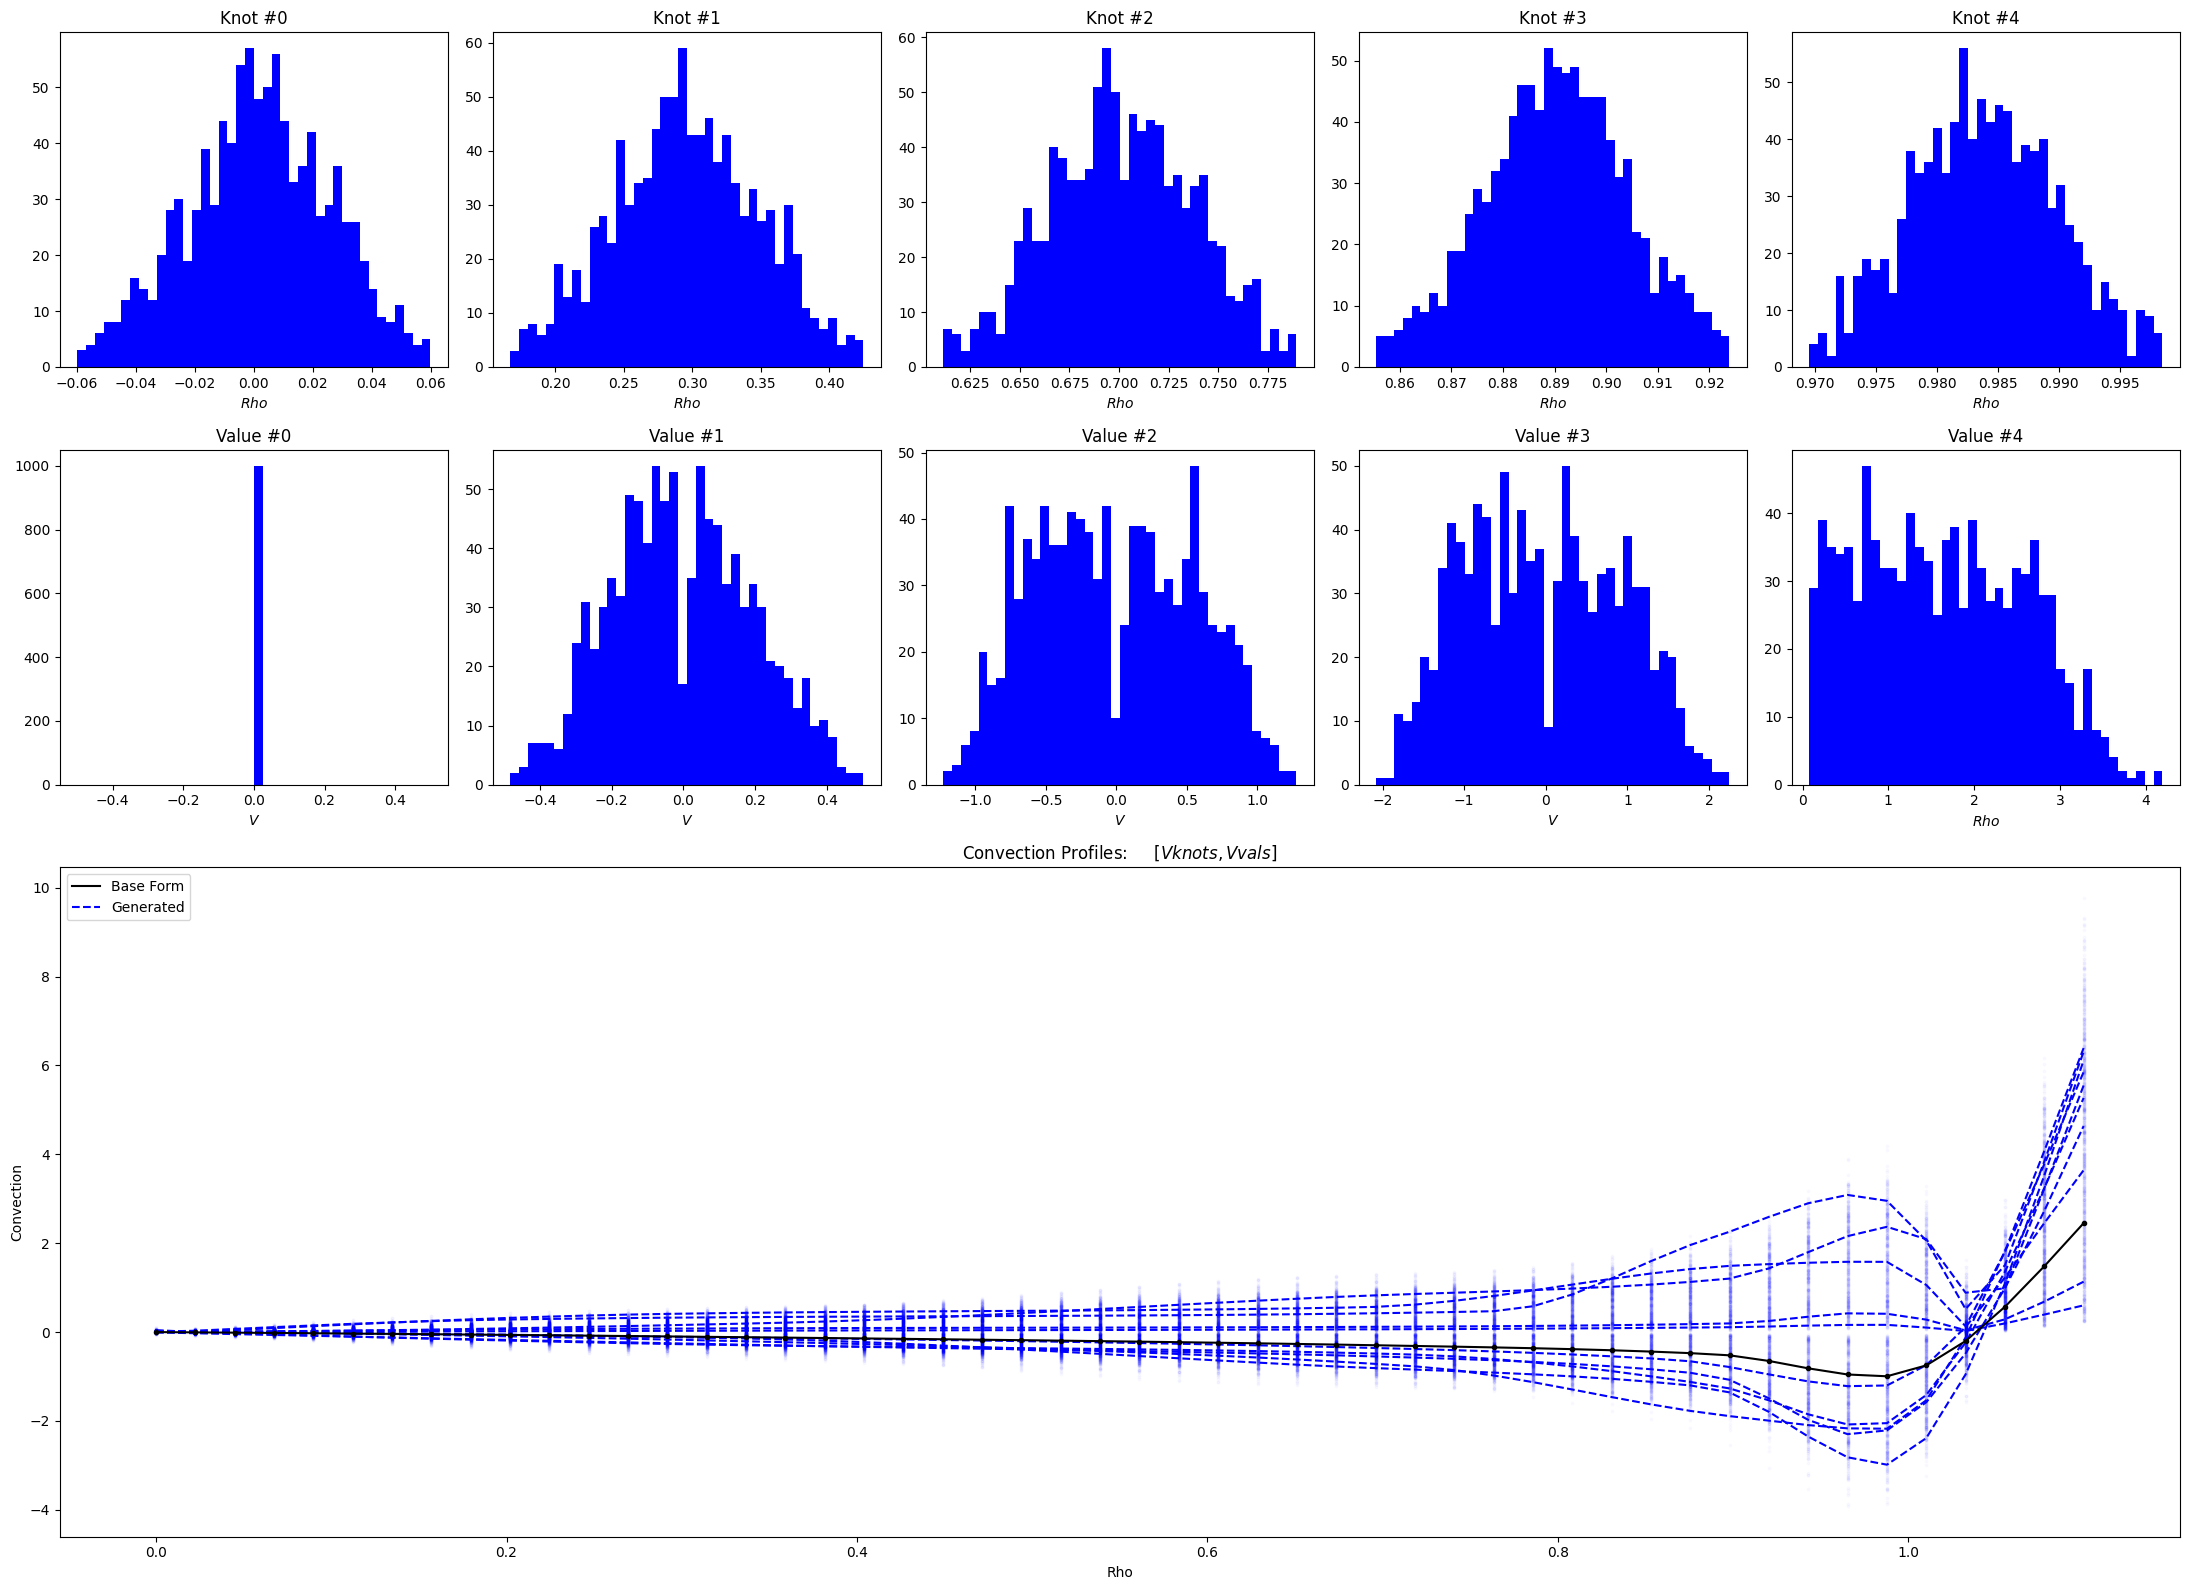

In [21]:
#Convection Function/Base Form
Vvals = np.array([0.0, -0.1, -0.3, -0.5, -1, 1.5])
Vknots = np.array([0, 0.297, 0.701, 0.890, 0.984, 1.078])
VFunca = lambda r, VK, VV: sp.interpolate.PchipInterpolator(VK, VV)(r)
VFunc = lambda r, VK, VV: bool(np.sign(VFunca(r, VK, VV)[nr//2])+1)*np.abs(VFunca(r, VK, VV)) + bool(np.sign(VFunca(r, VK, VV)[nr//2])-1)*VFunca(r, VK, VV)
VBase = VFunc(r, Vknots, Vvals)

#Distribution Tightness #!6 knots?
Vtightness = 0.7
Vwidthsv = np.array([0,0.9,0.5,0.55,0.45,0.3])
Vwidthsk = np.array([0.06,0.13,0.09,0.035,0.015,0.0075])

#Generating Parameters
valarr_Vv = []
valarr_Vk = []
for i, val in enumerate(Vvals):
    newvalv = RandNormal(val, Vwidthsv[i], size, dist_tightness=Vtightness, Absolute=0)
    valarr_Vv.append(newvalv)
    newvalk = RandNormal(Vknots[i], Vwidthsk[i], size, dist_tightness=Vtightness, Absolute=1)
    valarr_Vk.append(newvalk)
scalearrV = np.vstack((3*np.random.random(size=size)) + 0.1)
valarr_Vv = np.array(valarr_Vv).T
valarr_Vv = valarr_Vv*scalearrV
signarr = np.random.choice([-1,1],size).T
signarr = np.vstack((signarr,)*len(Vvals)).T
valarr_Vv = valarr_Vv*signarr
valarr_Vk = np.array(valarr_Vk).T

#Plotting
if Plotting:
    #Setting Up Plot
    ConvPlot = plt.figure(figsize=(22,16))
    Vgs = gridspec.GridSpec(3, 5, height_ratios=[1, 1, 2])
    Vax1 = []
    Vax2 = []
    for i in range(5):
        Vax1.append(ConvPlot.add_subplot(Vgs[0, i]))
        Vax2.append(ConvPlot.add_subplot(Vgs[1, i]))
    Vax3 = ConvPlot.add_subplot(Vgs[2, :])
    
    #Knots Histograms
    for i in range(5):
        Vax1[i].hist(valarr_Vk.T[i], bins=int(size/25), color='b')
        Vax1[i].set_xlabel(r'$Rho$')
        Vax1[i].set_title(f'Knot #{i}')
    
    #Vals Histograms
    for i in range(4):
        Vax2[i].hist(valarr_Vv.T[i], bins=int(size/25), color='b')
        Vax2[i].set_xlabel(r'$V$')
        Vax2[i].set_title(f'Value #{i}')
    Vax2[4].hist(np.abs(valarr_Vv.T[4]), bins=int(size/25), color='b') #TODO
    Vax2[4].set_xlabel(r'$Rho$')
    Vax2[4].set_title(f'Value #{4}')
    
    #Plotting Profiles
    Vax3.plot([],[],'-k', label='Base Form')
    Vax3.plot([],[],'--b', label='Generated')
    for i in range(size):
        Vi = VFunc(r, valarr_Vk[i], valarr_Vv[i])
        if i < 10:
            Vax3.plot(r, Vi, '--b')
        Vax3.scatter(r, Vi, c='b', s=3, alpha=0.02) #Alpha Auto Better
    Vax3.plot(r, VBase, '-k'); Vax3.plot(r, VBase, '.k')
    Vax3.set_xlabel('Rho'); Vax3.set_ylabel('Convection')
    Vax3.set_title(r'Convection Profiles:     $\left[Vknots, Vvals\right]$')
    Vax3.legend(); plt.tight_layout(); plt.show()

## Initial Density Profiles

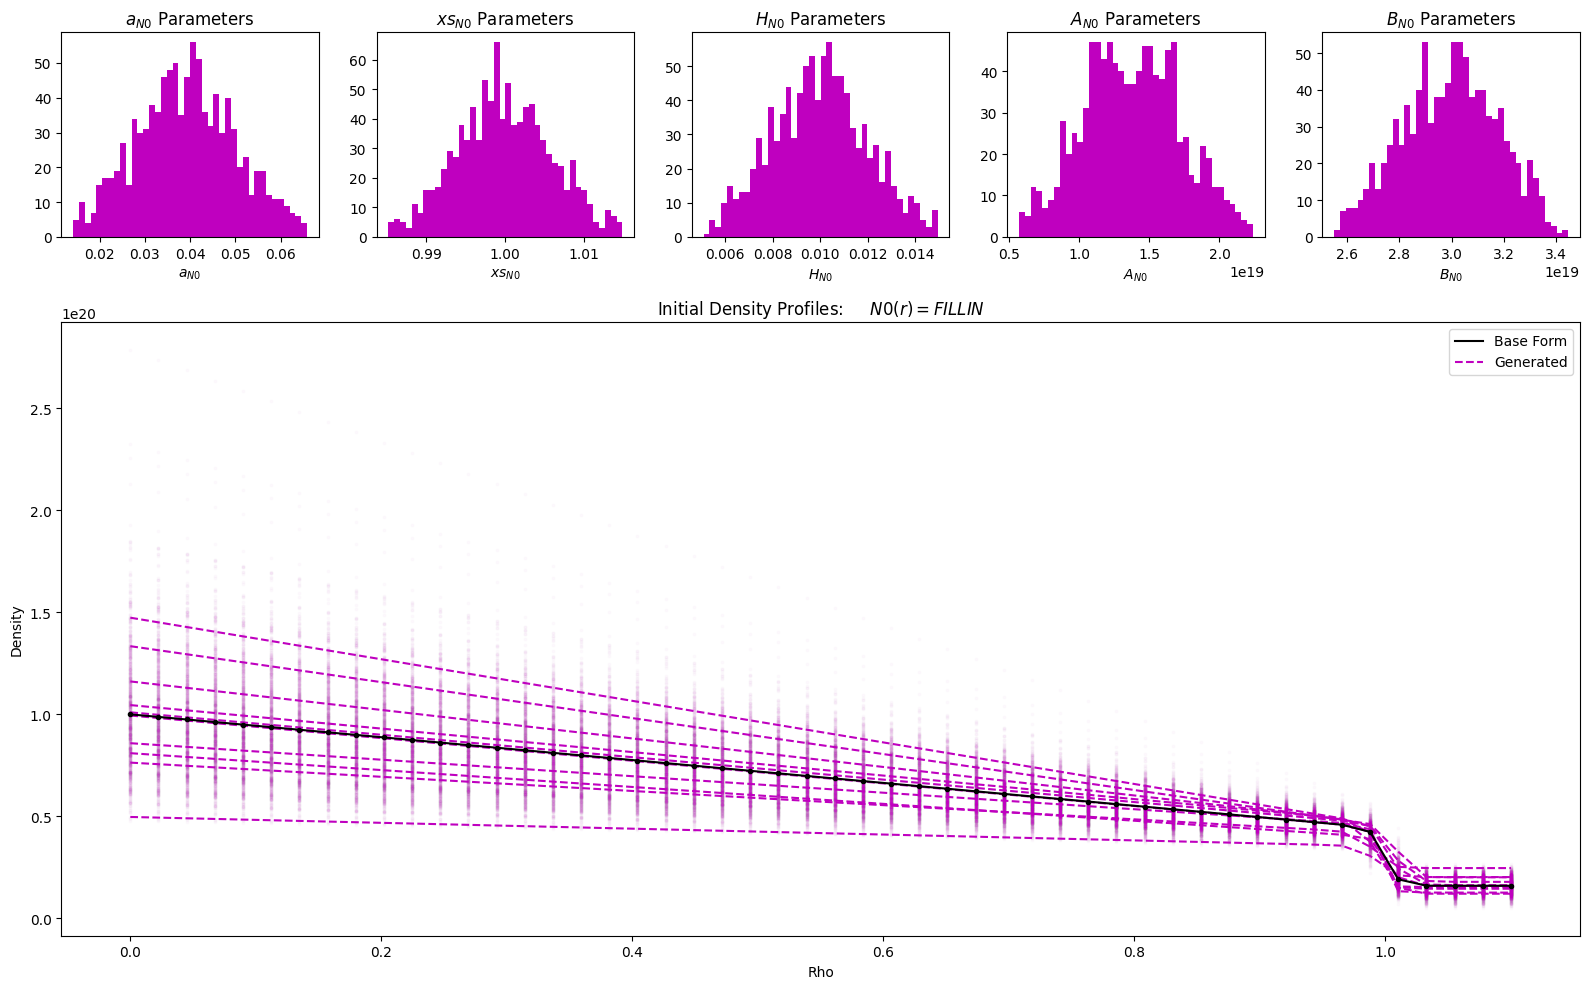

In [22]:
N0Funca = lambda r,a: ((1+a*r)*np.exp(r) - np.exp(-r))/(np.exp(r) + np.exp(-r))
N0Funcb = lambda r, xs, H: (xs - r)/H
N0Func = lambda r, a, xs, H, A, B: A*N0Funca(N0Funcb(r,xs,H),a) + B

N0Base = N0Func(r, 0.04, 1, 0.01, 1.4e19, 3e19)

N0tightness = 0.7

a_N0 = RandNormal(0.04, 0.65, size, dist_tightness=N0tightness, Absolute=0)
xs_N0 = RandNormal(1, 0.015, size, dist_tightness=N0tightness, Absolute=1)
H_N0 = RandNormal(0.01, 0.5, size, dist_tightness=N0tightness, Absolute=0)
A_N0 = RandNormal(1.4e19, 0.6, size, dist_tightness=N0tightness, Absolute=0)
B_N0 = RandNormal(3e19, 0.15, size, dist_tightness=N0tightness, Absolute=0)
        
        
if Plotting:
    
    #Setting Up Plot
    InitialDensePlot = plt.figure(figsize=(16,10))
    N0gs = gridspec.GridSpec(2, 5, height_ratios=[1, 3])
    N0ax1 = []
    for i in range(5):
        N0ax1.append(InitialDensePlot.add_subplot(N0gs[0, i]))
    N0ax2 = InitialDensePlot.add_subplot(N0gs[1, :])
    
    #a_N0 Histogram
    N0ax1[0].hist(a_N0, bins=int(size/25), color='m')
    N0ax1[0].set_xlabel(r'$a_{N0}$')
    N0ax1[0].set_title(r'$a_{N0}$ Parameters')
    
    #xs_N0 Histogram
    N0ax1[1].hist(xs_N0, bins=int(size/25), color='m')
    N0ax1[1].set_xlabel(r'$xs_{N0}$')
    N0ax1[1].set_title(r'$xs_{N0}$ Parameters')
    
    #H_N0 Histogram
    N0ax1[2].hist(H_N0, bins=int(size/25), color='m')
    N0ax1[2].set_xlabel(r'$H_{N0}$')
    N0ax1[2].set_title(r'$H_{N0}$ Parameters')
    
    #A_N0 Histogram
    N0ax1[3].hist(A_N0, bins=int(size/25), color='m')
    N0ax1[3].set_xlabel(r'$A_{N0}$')
    N0ax1[3].set_title(r'$A_{N0}$ Parameters')
    
    #B_N0 Histogram
    N0ax1[4].hist(B_N0, bins=int(size/25), color='m')
    N0ax1[4].set_xlabel(r'$B_{N0}$')
    N0ax1[4].set_title(r'$B_{N0}$ Parameters')
    

    
    #Plotting Profiles
    N0ax2.plot([],[],'-k', label='Base Form')
    N0ax2.plot([],[],'--m', label='Generated')
    for i in range(size):
        N0i = N0Func(r, a_N0[i], xs_N0[i], H_N0[i], A_N0[i], B_N0[i])
        if i < 10:
            N0ax2.plot(r, N0i, '--m')
        N0ax2.scatter(r, N0i, c='m', s=3, alpha=0.02) #Alpha Auto Better
    N0ax2.plot(r, N0Base, '-k'); N0ax2.plot(r, N0Base, '.k')
    N0ax2.set_xlabel('Rho'); N0ax2.set_ylabel('Density')
    N0ax2.set_title(r'Initial Density Profiles:     $N0(r) = FILL IN$') # TODO Fill In
    N0ax2.legend(); plt.tight_layout(); plt.show()

## 2D Source Visualization

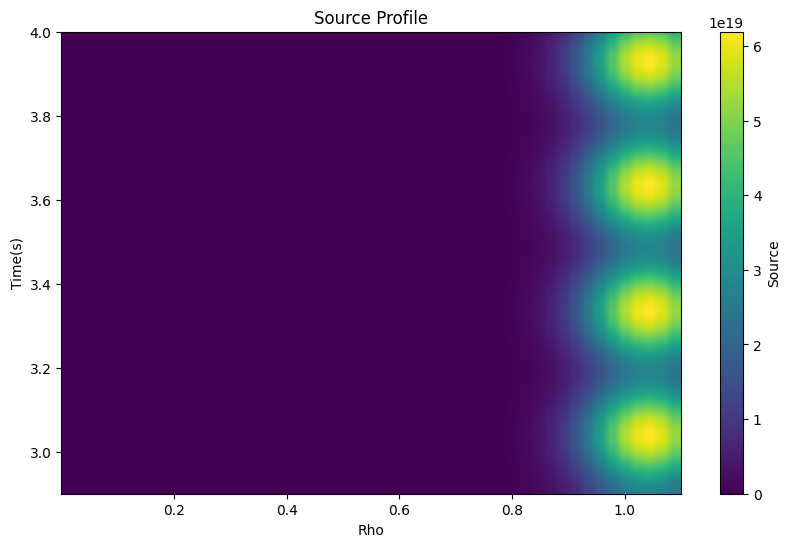

In [23]:
i = 0
SRExample = SRFunc(r, A_SR[i], rc_SR[i], o_SR[i])
STExample = STFunc(t, A_ST[i], f_ST[i])
ArrS = np.outer(STExample, SRExample)

plt.figure(figsize=(10, 6))
plt.imshow(
    ArrS,
    aspect='auto',
    cmap='viridis',
    origin='lower',
    extent=[r.min(), r.max(), t.min(), t.max()]
)
plt.colorbar(label='Source')
plt.xlabel('Rho')
plt.ylabel('Time(s)')
plt.title('Source Profile')
plt.show()

## Saving Data To Pickle File

In [24]:
if save:
    import pickle
    data = []
    for i in range(size):
        SRa = SRFunc(r, A_SR[i], rc_SR[i], o_SR[i])
        STa = STFunc(t, A_ST[i], f_ST[i])
        Da = DFunc(r, valarr_Dk[i], valarr_Dv[i])
        Va = VFunc(r, valarr_Vk[i], valarr_Vv[i])
        N0a = N0Func(r, a_N0[i], xs_N0[i], H_N0[i], A_N0[i], B_N0[i])
        dict1 = {'SR': SRa, 'ST': STa, 'D':Da, 'V':Va, 'N0':N0a, 'Dknots':valarr_Dk[i], 'Dvals':valarr_Dv[i], 'Vknots':valarr_Vk[i], 'Vvals':valarr_Vv[i], 'r':r, 't':t, 'STerms':{'A_SR':A_SR[i], 'rc_SR':rc_SR[i], 'o_SR':o_SR[i], 'A_ST':A_ST[i], 'f_ST':f_ST[i]}, 'N0 Terms':{'a_N0':a_N0[i], 'xs_N0':xs_N0[i], 'H_N0':H_N0[i], 'A_N0':A_N0[i], 'B_N0':B_N0[i]}}
        data.append(dict1)
    with open(Output_File, 'wb+') as f:
        # Pickle the 'data' dictionary using the highest protocol available.
        pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

## Archived Figure Code

In [25]:
# plt.plot([],[],'-m',label='Density')
# plt.plot([1,1],[0.16e20,1e20],'--r',label='Separatrix')
# plt.plot([0,1.1],[0.45e20,0.45e20],'-.b',label='Pedestal')
# plt.plot(r,N01,'-m')
# plt.xlabel('Rho')
# plt.ylabel(r'Density ($m^{-3}$)')
# plt.title('Tokamak Density Profile')
# plt.legend()
# plt.grid()
# #plt.savefig('TokamakDenseProfile.png', format='png') 
# plt.show()

In [26]:
# s = 1
# alpha = 0.03
# lw = 1.5
# countshow = 5

# if Plotting:
#     fig2 = plt.figure(figsize=(10,4))
    
    # for i in range(len(A_S)):
    #     Si = SFunc2(r, A_S[i], rc_S[i], o_S[i])
    #     if i < countshow:
    #         plt.plot(r, Si, '--g', lw=lw)
    #     plt.scatter(r, Si, c='g', s=s, alpha=alpha)
    # plt.plot(r, S1, '-k', label='Base Form')
    # plt.plot([],[],'-g', lw=lw, label='Generated')
    # plt.scatter(r, S1, c='k', s=s, alpha=1)
    # plt.ylabel('Source',fontsize=18)
    # plt.title(r'$S = Ae^{-(r-r_c)^2/\sigma ^2}$',fontsize=22)
    
    # for i in range(len(valarr_Dv)):
    #     DFunc2 = sp.interpolate.PchipInterpolator(valarr_Dk[i], valarr_Dv[i])
    #     Di = DFunc2(r)
    #     if i < countshow:
    #         plt.plot(r, Di, '--r', lw =lw)
    #     plt.scatter(r, Di, c='r', s=s, alpha=alpha)
    # plt.plot(r, D1, '-k', label='Base Form')
    # plt.plot([],[],'-r', lw=lw, label='Generated')
    # plt.scatter(r, D1, c='k', s=s, alpha=1)
    # plt.ylabel('Diffusion',fontsize=18)
    # plt.ylim(-0.01,5)
    # plt.title('Dknots = [0, 0.19, 0.46, 0.85, 0.94, 1.08]',fontsize=22)
    
    # for i in range(len(valarr_Vv)):
    #     VFunc2 = sp.interpolate.PchipInterpolator(valarr_Vk[i], valarr_Vv[i])
    #     Vi = VFunc2(r)
    #     if i < countshow:
    #         plt.plot(r, Vi, '--b', lw=lw)
    #     plt.scatter(r, Vi, c='b', s=s, alpha=alpha)
    # plt.plot(r, V1, '-k', label='Base Form')
    # plt.plot([],[],'-b', lw=lw, label='Generated')
    # plt.scatter(r, V1, c='k', s=s, alpha=1)
    # plt.ylabel('Convection',fontsize=18)
    # plt.ylim(-5,5)
    # plt.title('Vknots = [0, 0.30, 0.70, 0.89, 0.98, 1.08]', fontsize=22)

#     for i in range(len(A_N0)):
#         N0i = N0Func2(r, a_N0[i], xs_N0[i], H_N0[i], A_N0[i], B_N0[i])
#         if i < countshow:
#             plt.plot(r, N0i, '--m', lw=lw)
#         plt.scatter(r, N0i, c='m', s=s, alpha=alpha)
#     plt.plot(r, N01, '-k', label='Base Form')
#     plt.plot([],[],'-m', lw=lw, label='Generated')
#     plt.scatter(r, N01, c='k', s=s, alpha=1)
#     plt.ylim(0.05e20,1.5e20)
#     plt.ylabel('Density',fontsize=18)
    
#     plt.title(r'$n(t=0s) = A*mtanh((r_s - r)/H,\alpha) + B$', fontsize=22)
    
#     plt.xlabel('Rho')
#     plt.legend(fontsize=15)
#     plt.grid()
#     plt.tight_layout()

# #plt.savefig('InitDenseMod.png', format='png') 
# plt.show()